# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set(rc={'figure.figsize': (7, 4)})
sns.set_style('whitegrid')
import statsmodels.formula.api as smf

# Databases

In [2]:
df = pd.read_csv("../data/measurements.csv")
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
df = pd.read_csv("../data/measurements.csv", decimal=",")
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df_excel = pd.read_excel("../data/measurements2.xlsx")
df_excel

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
# Check if they are exaclty the same:
duplicated = pd.concat([df, df_excel])
duplicated.duplicated().sum(), len(df) # The data in both databses is the same

(388, 388)

# EDA

**Variables**:
According to Kaggle, the units it which these variables are measured are:

- distance: km
- consume: l/100km
- speed: average speed (km/h)
- temp_inside: ºC
- temp_outside: ºC
- specials: if something happened (rain, AC, AC+rain...)
- AC: 0/1, if air conditioning was on or not
- rain: 0/1, if it was raining
- sun: 0/1, if it was sunny
- refill litters: l
- refill gas: type of gas

In [6]:
df.shape

(388, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [8]:
pd.DataFrame({"percentage_miss": round(df.isna().sum()/len(df)*100, 2)})

,percentage_miss
distance,0.00
consume,0.00
speed,0.00
temp_inside,3.09
temp_outside,0.00
specials,76.03
gas_type,0.00
AC,0.00
rain,0.00
sun,0.00


## NaN

Knowing what "special" means and its amount of miss, let's drop it.
Having this amount of miss let's also drop refill liters and refill gas.

In [9]:
data = df.drop(columns=["specials", "refill liters", "refill gas"])
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


To fill the NaN in temp_inside, let's check it's metrics and distribution 

In [10]:
data.temp_inside.describe()

count    376.000000
mean      21.929521
std        1.010455
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

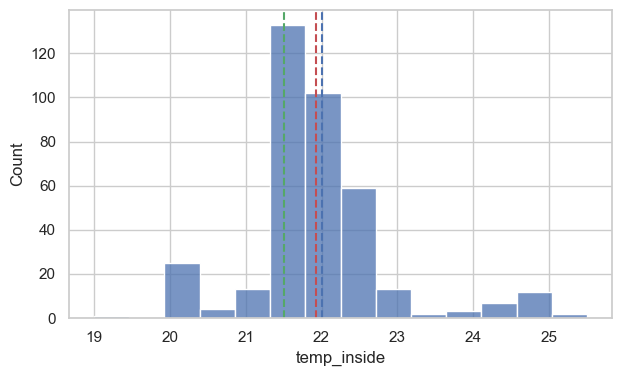

In [11]:
sns.histplot(data["temp_inside"], bins=14)
plt.axvline(data.temp_inside.mean(), c="r", label="Average temp", linestyle="--")
plt.axvline(data.temp_inside.median(), c="b", label="Median temp", linestyle="--");
plt.axvline(data.temp_inside.mode()[0], c="g", label="Median temp", linestyle="--");

Any of the three central metrics would do, but I prefer mean or median.

In [12]:
data["temp_inside"].fillna(data["temp_inside"].mean(), inplace=True)

In [13]:
data["gas_type"].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [14]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

## Features useful for finding the best gas type

Taking into consideration the meaning of each variable, these are the ones included in the analysis:
- total_consumed: distance * consume
- speed
- diff_temp: temp_inside - temp_outside
- AC
- sun
- rain

Price is an important variable to take into account to know which gas type is economically more efficient, and not only know which consumes more. But E10 can be SP98 and SP95, so it's hard for me to know the price that I would be looking for, and also prices fluctuate amogst cities or even petrol stations. I decided to have it as an additional possible future evaluation.

In [15]:
data["total_consumed"] = data["distance"] * data["consume"]
data["diff_temp"] = data["temp_inside"] - data["temp_outside"]
data.drop(columns=["distance", "consume", "temp_inside", "temp_outside"], inplace=True)
data.to_csv("../data/df_clean.csv", index=False)
data.head()

,speed,gas_type,AC,rain,sun,total_consumed,diff_temp
0,26,E10,0,0,0,140.00,9.5
1,30,E10,0,0,0,50.40,8.5
2,38,E10,0,0,0,61.60,6.5
3,36,E10,0,0,0,50.31,7.5
4,46,E10,0,0,0,83.25,6.5


In [16]:
data.describe()

,speed,AC,rain,sun,total_consumed,diff_temp
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,0.077320,0.123711,0.082474,93.529433,10.571274
std,13.598524,0.267443,0.329677,0.275441,111.596700,6.698575
min,14.000000,0.000000,0.000000,0.000000,12.000000,-8.000000
25%,32.750000,0.000000,0.000000,0.000000,55.165000,6.375000
50%,40.500000,0.000000,0.000000,0.000000,68.060000,11.500000
75%,50.000000,0.000000,0.000000,0.000000,91.650000,14.625000
max,90.000000,1.000000,1.000000,1.000000,1145.330000,26.000000


## Visualizations

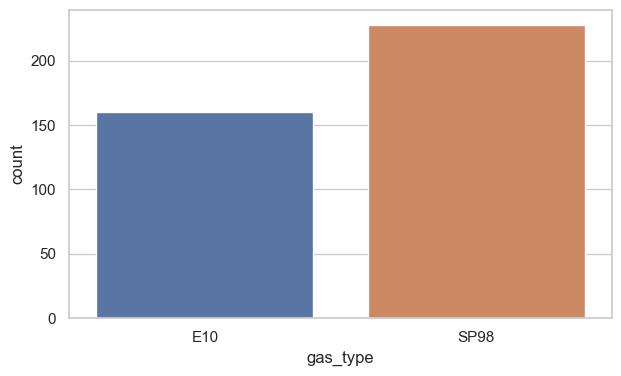

In [17]:
sns.countplot(x = data["gas_type"]);

**Most of the trips used SP98.**

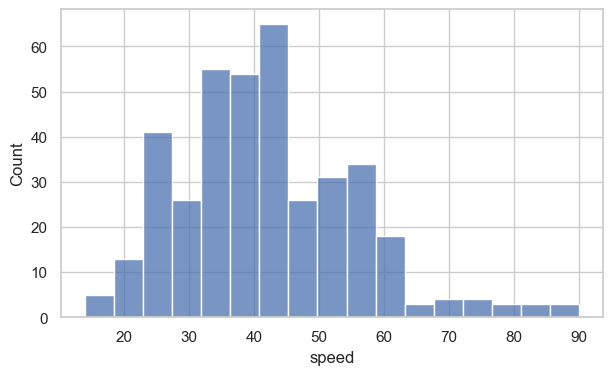

In [18]:
sns.histplot(data.speed);

**Speed in the normal range of urban trips.**

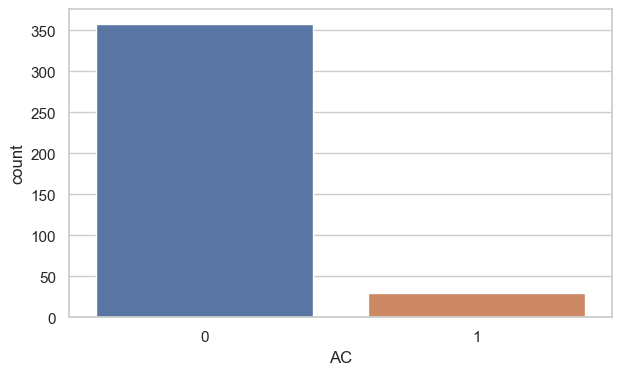

In [19]:
sns.countplot(x = data.AC);

**Most of the trips were done without AC.**

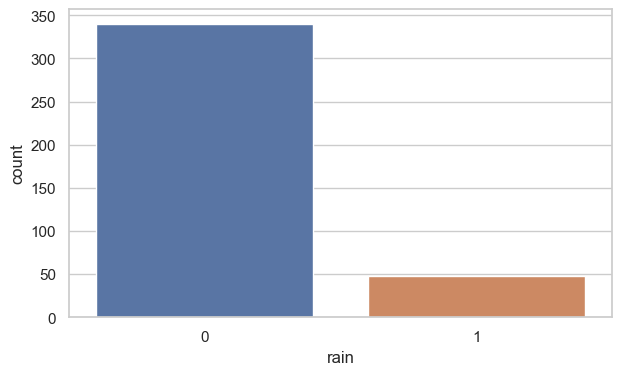

In [20]:
sns.countplot(x = data.rain);

**Most of the trips were done without rain.**

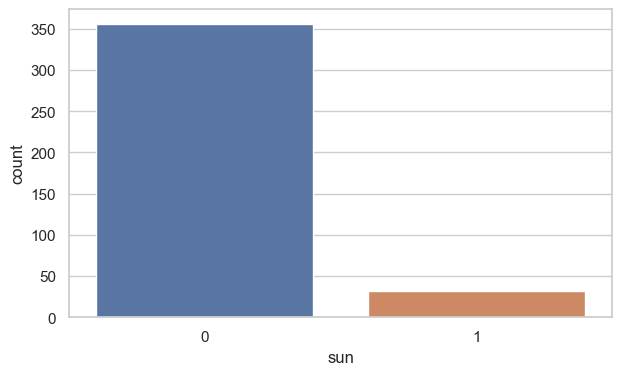

In [21]:
sns.countplot(x = data.sun);

**Most of the trips were done without too much sun.**

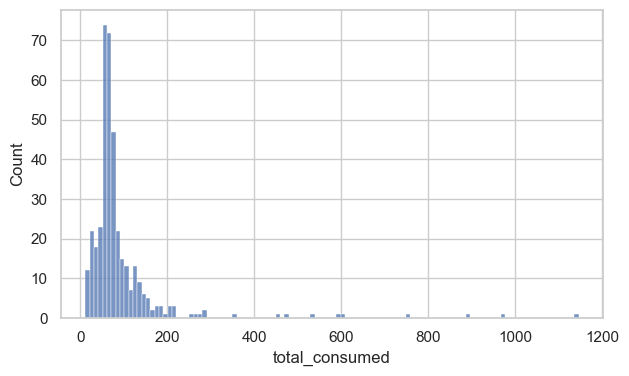

In [22]:
sns.histplot(data.total_consumed);

**Total gas consumed seems to show extreme maximum values.**

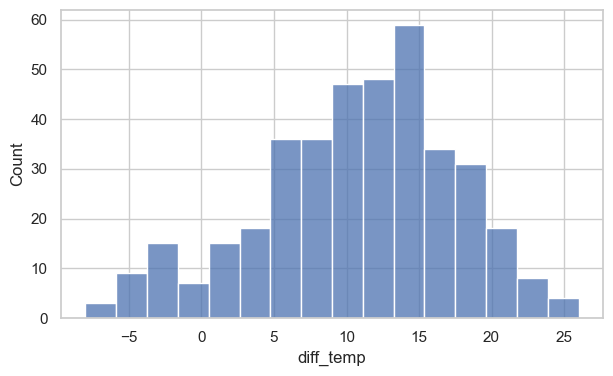

In [23]:
sns.histplot(data.diff_temp);

**Most of the values are positive, meaning that usually the temperatue inside the car is higher than ouside.**

### Relatonship between total consumed for each gas type and  every variable

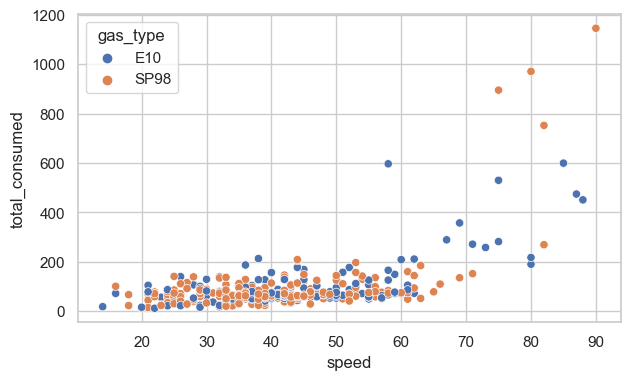

In [24]:
sns.scatterplot(data = data, x = "speed", y ="total_consumed", hue = "gas_type");

**Except for extreme values (infrequent high speeds), the total consumed seems lower for SP98 for every value of speed.**

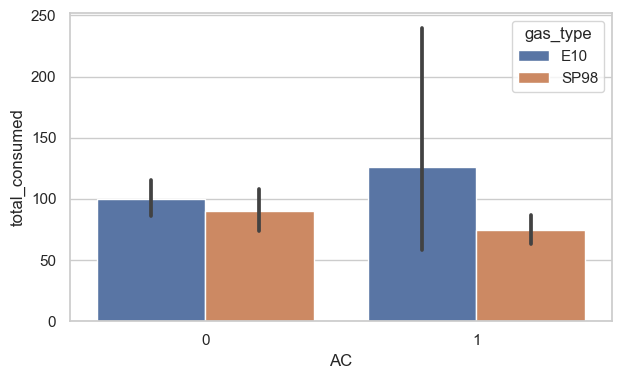

In [25]:
sns.barplot(data = data, x = "AC", y ="total_consumed", hue = "gas_type");

**The toal consumed seems lower for SP98 using AC and not using it.**

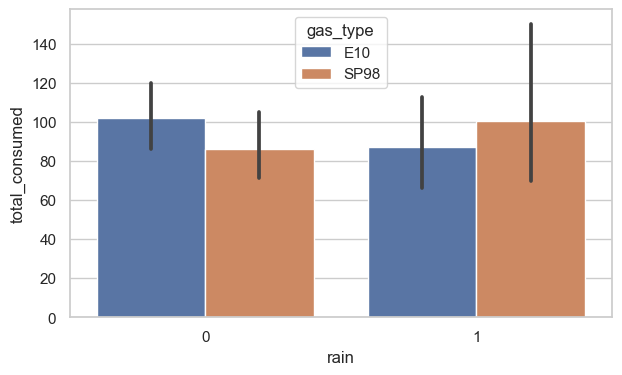

In [26]:
sns.barplot(data = data, x = "rain", y ="total_consumed", hue = "gas_type");

**When raining the total consumed of SP98 seems higher.**

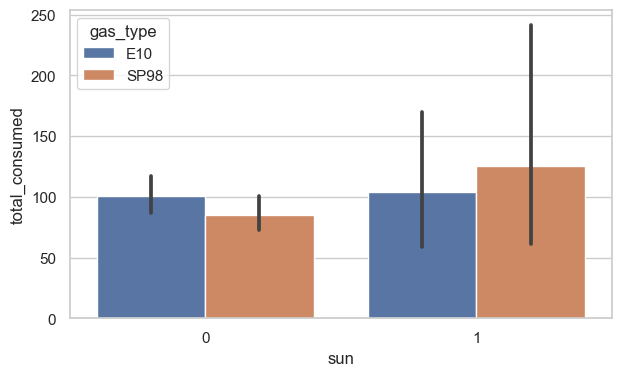

In [27]:
sns.barplot(data = data, x = "sun", y ="total_consumed", hue = "gas_type");

**When it's too sunny, the total consumed of SP98 seems higher.**

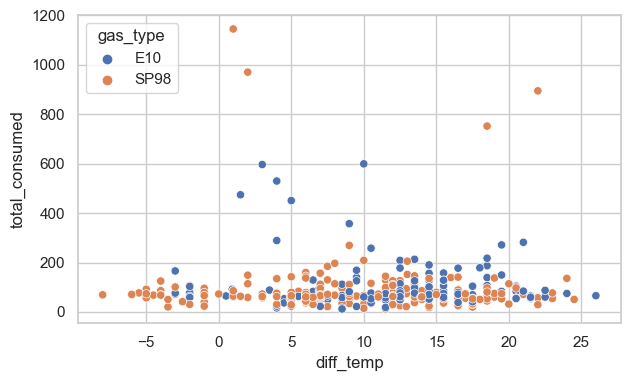

In [28]:
sns.scatterplot(data = data, x = "diff_temp", y ="total_consumed", hue = "gas_type");

**Except for four extreme values, the toal consumed seems lower for SP98 for every value of difference in temperature between inside and outside.**

# Hypothesis contrast
- H0: both gas types consume the same ammount in the same conditions.
- H1: they have different behaviours in the same conditions.

## Visualization: correlation and collinearity

C:\Users\gdcma\AppData\Local\Temp\ipykernel_13832\1371328609.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True);


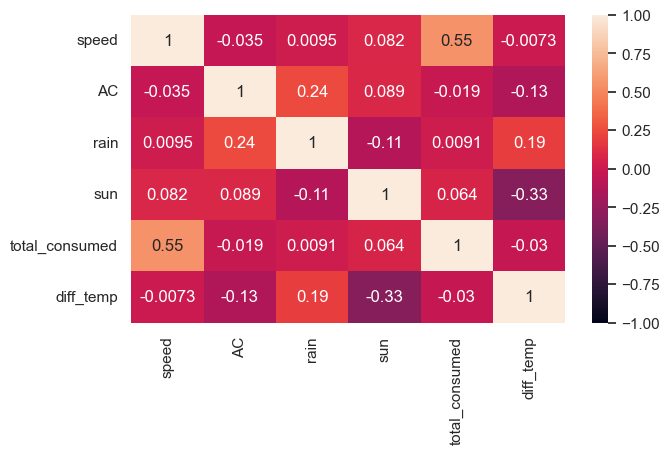

In [29]:
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True);

**The total consumed is highly correlated with speed. It shows very low correlation with the gas type, and the rest of the variables.**

## Results

In [30]:
results = smf.ols("total_consumed ~ gas_type + speed + AC + rain + sun + diff_temp", data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_consumed   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     27.94
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.21e-27
Time:                        02:00:20   Log-Likelihood:                -2308.7
No. Observations:                 388   AIC:                             4631.
Df Residuals:                     381   BIC:                             4659.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -90.9174     19.552     -4.650      0.000    -129.361     -52.473
gas_type[T.SP98]    -1.4108      9.895     -0.143      0.887     -20.867      18.045
speed                4.5108      0.354     12.753      0.000       3.815       5.206
AC                  -2.5420     18.788     -0.135      0.892     -39.483      34.399
rain                 4.1141     15.392      0.267      0.789     -26.150      34.378
sun                  5.2353     18.441      0.284      0.777     -31.025      41.495
diff_temp           -0.4349      0.782     -0.556      0.578      -1.972       1.102
==============================================================================
Omnibus:                      406.253   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17930.537
Skew:                           4.584   Prob(JB):                         0.00
Kurtosis:                      35.016   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

**The difference of total consumed between both gas types is not statistically significant.**

**The decision of choosing one or the other would be made according to price, availability or preference.**

**It is likely that there exists a statistically significant difference between prices for trips made with one gas type or the other. In that case, it would be interesting to develop a model to predict how much a certain trip would cost considering gas type and the rest of explanatory factors.**